# TP 2 - IA - Grupo 10
# Evaluación de Riesgos Crediticios usando Algoritmos Genéticos

## Descripción del problema

El problema que se quiere resolver es identificar qué grupo de personas representa el menor riesgo al momento de otorgar créditos. Para esto, se analizarán varios grupos con características diferentes, como ingresos, historial crediticio, y si reciben algún tipo de ayuda social, entre otros. El objetivo es encontrar patrones que permitan dar créditos de manera más segura, evitando que se le otorguen a personas con alto riesgo de no pagar y asegurando que se le concedan a quienes tengan mayor capacidad de pago.

Los métodos actuales para evaluar el riesgo crediticio a veces no son lo suficientemente precisos, ya que no toman en cuenta bien la interacción entre las distintas características de las personas. Esto puede hacer que se den créditos a personas con un riesgo alto o que se rechacen a buenos candidatos. Por eso, es necesario un sistema inteligente que analice mejor los datos y haga predicciones más exactas.

## Justificación del Uso de Algoritmos Genéticos

Para resolver este problema, se va a utilizar un **Algoritmo Genético (AG)**. Este tipo de algoritmo es útil para buscar soluciones óptimas en problemas con muchas variables y de alta complejidad. Los AG son adecuados para explorar combinaciones de factores, como ingresos o historial crediticio, y encontrar soluciones que minimicen el riesgo crediticio, maximizando al mismo tiempo la eficiencia en la búsqueda de respuestas óptimas.

## Características que serán evaluadas para encontrar la solución

Las características seleccionadas reflejan el perfil financiero de las personas, lo que ayudará a la empresa a evaluar el riesgo de otorgar un crédito. Cada característica tiene una justificación clara:

- Edad: Influye en la estabilidad financiera y la capacidad de cumplir con el pago. Por ejemplo, personas en edad laboral pueden tener menos riesgo que personas muy jóvenes o mayores sin ingresos fijos.
- Historial crediticio: Es clave para conocer el comportamiento de una persona respecto a pagos previos, un buen historial reduce el riesgo.
- Tipo de empleo (blanco o negro): Las personas que trabajan en blanco suelen tener más estabilidad económica, lo que reduce el riesgo de impago.
- Estado civil (soltero/casado/divorciado): A veces, personas casadas o con responsabilidades familiares pueden tener más estabilidad económica.
- Plan social: Indica que la persona recibe ayuda del estado, lo que puede significar un menor ingreso disponible y mayor riesgo.
- Cantidad de ingresos: Un ingreso alto reduce el riesgo de impago, mientras que ingresos bajos lo incrementan.

La combinación de estas características permite construir un perfil de riesgo más completo para cada persona y facilita el armado de una selección de personas con el menor riesgo posible.

## Tecnologías Utilizadas

- **Python**: Lenguaje de programación principal.
- **DEAP**: Librería especializada en algoritmos evolutivos y genéticos.
- **Numpy**: Para operaciones numéricas y manejo de matrices.
- **Matplotlib**: Para la visualización de resultados y gráficos.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
import time

In [2]:
def evaluar_edad(edad):
    if edad == [0, 0]:
        return 3
    elif edad == [0, 1]:
        return 1
    elif edad == [1, 0]:
        return 2
    else:
        return 100

def evaluar_historial_crediticio(historial):
    if historial == [0, 0]:
        return 4
    elif historial == [0, 1]:
        return 3
    elif historial == [1, 0]:
        return 2
    elif historial == [1, 1]:
        return 1
    else:
        return 100

def evaluar_tipo_empleo(tipo_empleo):
    return 2 if tipo_empleo == 1 else 1

def evaluar_estado_civil(estado_civil):
    if estado_civil == [0, 0]:
        return 2
    elif estado_civil == [0, 1]:
        return 1
    elif estado_civil == [1, 0]:
        return 3
    else:
        return 100

def evaluar_plan_social(plan_social):
    return 2 if plan_social == 0 else 1

def evaluar_ingresos(ingresos):
    if ingresos == [0, 0]:
        return 3
    elif ingresos == [0, 1]:
        return 2
    elif ingresos == [1, 0]:
        return 1
    else:
        return 100

In [3]:
def funcion_de_aptitud(individual):
    riesgo = 0
    riesgo += evaluar_edad(individual[0:2])
    riesgo += evaluar_historial_crediticio(individual[2:4])
    riesgo += evaluar_tipo_empleo(individual[4])
    riesgo += evaluar_estado_civil(individual[5:7])
    riesgo += evaluar_plan_social(individual[7])
    riesgo += evaluar_ingresos(individual[8:10])
    return riesgo,

In [4]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, 10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", funcion_de_aptitud)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [5]:
def graficar_resultados(logbook):
    gen = logbook.select("gen")
    min_fits = logbook.select("min")
    avg_fits = logbook.select("avg")

    plt.figure(figsize=(10, 6))
    plt.plot(gen, min_fits, label="Mínimo riesgo")
    plt.plot(gen, avg_fits, label="Riesgo promedio")
    plt.xlabel("Generación")
    plt.ylabel("Riesgo")
    plt.title("Evolución del Riesgo Crediticio a lo Largo de las Generaciones")
    plt.legend(loc="upper right")
    plt.grid(True)
    plt.show()

In [6]:
def mostrar_mejor_individuo(best_individual):
    print(f"Mejor individuo (cromosoma): {best_individual}")
    print(f"Riesgo asociado: {funcion_de_aptitud(best_individual)[0]}")
    print(f"Edad: {best_individual[0:2]}")
    print(f"Historial crediticio: {best_individual[2:4]}")
    print(f"Tipo de empleo: {best_individual[4]}")
    print(f"Estado civil: {best_individual[5:7]}")
    print(f"Plan social: {best_individual[7]}")
    print(f"Ingresos: {best_individual[8:10]}")

In [7]:
def interpretar_cromosoma(cromosoma):
    edad_bits = cromosoma[0:2]
    historial_bits = cromosoma[2:4]
    empleo_bit = cromosoma[4]
    estado_civil_bits = cromosoma[5:7]
    plan_social_bit = cromosoma[7]
    ingresos_bits = cromosoma[8:10]

    if edad_bits == [0, 0]:
        edad = "18-25 años"
    elif edad_bits == [0, 1]:
        edad = "26-50 años"
    elif edad_bits == [1, 0]:
        edad = "51-80 años"
    else:
        edad = "Edad desconocida"
    
    if historial_bits == [0, 0]:
        historial = "Menor a 400"
    elif historial_bits == [0, 1]:
        historial = "400-600"
    elif historial_bits == [1, 0]:
        historial = "600-800"
    elif historial_bits == [1, 1]:
        historial = "Mayor a 800"
    
    empleo = "Empleo en negro" if empleo_bit == 1 else "Empleo en blanco"
    
    if estado_civil_bits == [0, 0]:
        estado_civil = "Soltero"
    elif estado_civil_bits == [0, 1]:
        estado_civil = "Casado"
    elif estado_civil_bits == [1, 0]:
        estado_civil = "Divorciado"
    else:
        estado_civil = "Estado civil desconocido"
    
    plan_social = "No recibe plan social" if plan_social_bit == 1 else "Recibe plan social"
    
    if ingresos_bits == [0, 0]:
        ingresos = "Menor a 600,000"
    elif ingresos_bits == [0, 1]:
        ingresos = "600,000-1,200,000"
    elif ingresos_bits == [1, 0]:
        ingresos = "Mayor a 1,200,000"
    else:
        ingresos = "Ingresos desconocidos"
    
    print(f"Edad: {edad} - {edad_bits}")
    print(f"Historial crediticio: {historial} - {historial_bits}")
    print(f"Empleo: {empleo} - {empleo_bit}")
    print(f"Estado civil: {estado_civil} - {estado_civil_bits}")
    print(f"Plan social: {plan_social} - {plan_social_bit}")
    print(f"Ingresos: {ingresos} - {ingresos_bits}")


In [59]:
toolbox.register("select", tools.selRoulette)

toolbox.register("mate", tools.cxOnePoint)

toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.1)


gen	nevals	min	avg 
0  	20    	7  	84.7
1  	16    	9  	153.2
2  	17    	12 	187.55
3  	20    	108	207.35
4  	19    	107	202.3 
5  	20    	107	207.4 
6  	18    	110	207.35
7  	19    	107	207.55
8  	18    	110	226.85
9  	16    	111	226.4 
10 	15    	205	240.7 
11 	19    	205	251.15
12 	17    	107	265.85
13 	17    	204	266   
14 	18    	106	255.7 
15 	18    	108	270.85
16 	18    	108	285.8 
17 	19    	110	285.6 
18 	17    	110	290.2 
19 	17    	110	290.55
20 	14    	205	290.3 


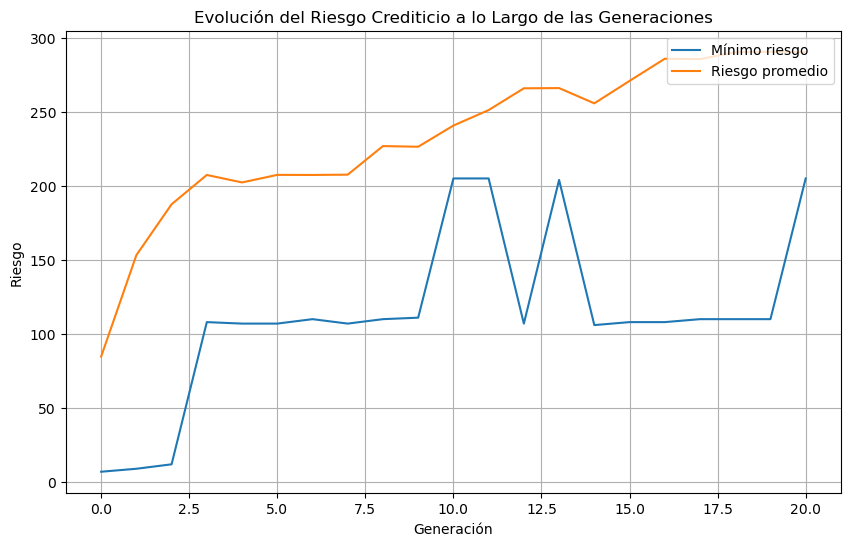

Mejor individuo (cromosoma): [0, 1, 1, 1, 0, 0, 1, 1, 0, 1]
Mejores individuos (cromosomas): [[0, 1, 1, 1, 0, 0, 1, 1, 0, 1], [0, 1, 1, 1, 0, 0, 0, 0, 1, 0], [1, 0, 1, 1, 0, 0, 0, 0, 1, 0], [0, 1, 1, 1, 0, 0, 0, 1, 0, 0], [0, 1, 1, 1, 1, 0, 0, 1, 0, 1], [1, 0, 1, 0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 0, 0, 0, 0, 0, 1, 0], [0, 1, 0, 1, 1, 1, 0, 1, 0, 1], [0, 0, 1, 1, 0, 1, 0, 1, 0, 0], [1, 0, 0, 1, 1, 0, 0, 0, 0, 0]]

Los 10 mejores individuos

Individuo 1: [0, 1, 1, 1, 0, 0, 1, 1, 0, 1]
Edad: 26-50 años - [0, 1]
Historial crediticio: Mayor a 800 - [1, 1]
Empleo: Empleo en blanco - 0
Estado civil: Casado - [0, 1]
Plan social: No recibe plan social - 1
Ingresos: 600,000-1,200,000 - [0, 1]
Riesgo asociado: 7

Individuo 2: [0, 1, 1, 1, 0, 0, 0, 0, 1, 0]
Edad: 26-50 años - [0, 1]
Historial crediticio: Mayor a 800 - [1, 1]
Empleo: Empleo en blanco - 0
Estado civil: Soltero - [0, 0]
Plan social: Recibe plan social - 0
Ingresos: Mayor a 1,200,000 - [1, 0]
Riesgo asociado: 8

Individuo 3: [1, 0, 1, 1

In [63]:
def main():
    random.seed(time.time())
    
    population = toolbox.population(n=20)
    ngen = 20
    cxpb = 0.8
    mutpb = 0.3

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("avg", np.mean)

    logbook = tools.Logbook()

    halloffame = tools.HallOfFame(10)

    population, logbook = algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen, 
                                              stats=stats, halloffame=halloffame, verbose=True)

    graficar_resultados(logbook)
    
    best_individual = halloffame[0]

    print(f"Mejor individuo (cromosoma): {best_individual}")
    print(f"Mejores individuos (cromosomas): {halloffame}")
    
    print()
    print(f"Los 10 mejores individuos")
    print()

    for i in range(10):
        print(f"Individuo {i+1}: {halloffame[i]}")
        interpretar_cromosoma(halloffame[i])
        print(f"Riesgo asociado: {funcion_de_aptitud(halloffame[i])[0]}")
        print()
    

main()